In [1]:
#Libraries
import os, shutil, glob
from pathlib import Path
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import plotly

import anndata as ad
import scanpy as sc

import pdb

import pydeseq2
from pydeseq2.DeseqDataSet import DeseqDataSet
from pydeseq2.DeseqStats import DeseqStats

In [2]:
#Load data
adata= ad.read_h5ad(r"C:\Users\moren\PycharmProjects\TFM\R\ELA_DFT\anndata_ELA_DFT\ELA_DFT_Anndata.h5ad")
#adata= ad.read_h5ad(f'/home/neuroimagen2/Downloads/ELA_DFT_Anndata.h5ad')

#IO paths
ipath = r'C:\Users\moren\PycharmProjects\TFM\ELA_DFT_Analysis'
opath = r'C:\Users\moren\PycharmProjects\TFM\ELA_DFT_Analysis\plots'
opath_files = r'C:\Users\moren\PycharmProjects\TFM\ELA_DFT_Analysis\\'

In [3]:
adata.obs.head(5)

,sample.ID.number,lane.ID,unique.ID,qc.data.dir,group.ID,group2.ID,tissue.ID,BK,GENDER,AGE,Ast,End,Ex,In,Mic,Oli,Opc,Per,ID
long10BLACK,10,unknown,long10BLACK,long10BLACK,TDP,TDP,frontal,1834,M,77,0.135844,0.044044,0.649717,0.038132,0.019386,0.111752,0.000002,0.001123,long10BLACK
long11BLACK,11,unknown,long11BLACK,long11BLACK,C9orf72,C9orf72,frontal,414,M,66,0.127826,0.045206,0.609181,0.066464,0.029105,0.121829,0.000001,0.000387,long11BLACK
long12BLACK,12,unknown,long12BLACK,long12BLACK,C9orf72,C9orf72,frontal,421,F,69,0.137009,0.029148,0.704188,0.086086,0.010090,0.031240,0.000001,0.002238,long12BLACK
long13BLACK,13,unknown,long13BLACK,long13BLACK,C9orf72,C9orf72,frontal,811,M,61,0.233917,0.074595,0.485634,0.021129,0.027712,0.144914,0.001586,0.010513,long13BLACK
long14BLACK,14,unknown,long14BLACK,long14BLACK,C9orf72,C9orf72,frontal,1041,M,66,0.151342,0.058873,0.604842,0.051649,0.012300,0.117000,0.000003,0.003992,long14BLACK


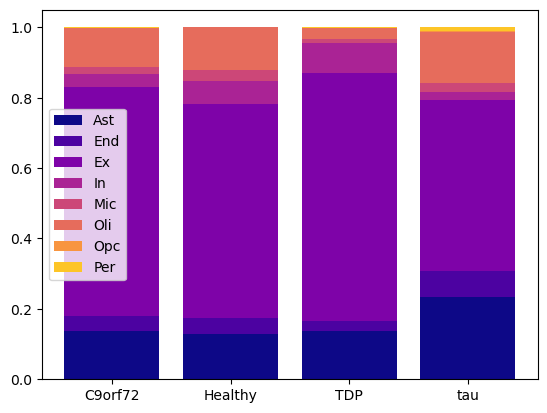

In [26]:
# Subjects cell fractions health condition
#=========================================

# Calculate means by grour of disease
df = adata.obs[['ID', 'group.ID', 'Ast','End', 'Ex', 'In', 'Mic', 'Oli', 'Opc', 'Per']]
df_cell_fraction = df.groupby('group.ID').mean()

# Extract the ID and variable columns
ids = df_cell_fraction.index
vars = df.drop(['ID', 'group.ID'], axis=1)

# Create the plot
fig, ax = plt.subplots()

# Create the bars for each subject
for i, id in enumerate(ids):
    bottom = 0
    for j, var in enumerate(vars.columns):
        ax.bar(id, vars.iloc[i][j], bottom=bottom, color=plt.cm.plasma(j/len(vars.columns)))
        bottom += vars.iloc[i][j]
            
# Add a legend
ax.legend(vars.columns, loc=0)

#x-labels rotation
#ax.tick_params(axis='x', rotation=80)

#Save the plot
plt.savefig(opath + 'FTD_stackedbarplot.png', dpi = 300)

# Show the plot
plt.show()


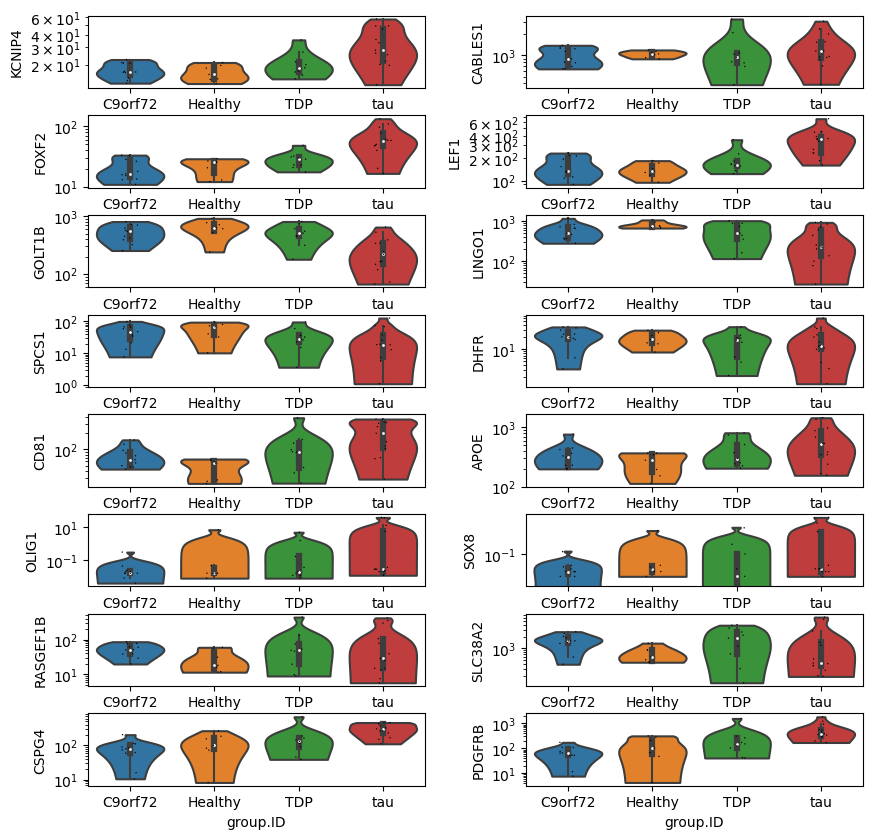

In [3]:
# Expression gene plots for cell type
#====================================

# Create a 7x2 grid of subplots
fig, axs = plt.subplots(8, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.38)

#print(f'Plot Astrocytes gene expression between four groups'),
sc.pl.violin(adata, keys=['KCNIP4'], groupby='group.ID', layer="Ast", inner='box', log=True, ax=axs[0,0], show=False)
sc.pl.violin(adata, keys=["CABLES1"], groupby='group.ID', layer="Ast", inner='box', log=True, ax=axs[0,1], show=False)

#print(f'Plot Endothelial cell gene expression between four groups'),
sc.pl.violin(adata, keys=['FOXF2'], groupby='group.ID', layer="End", inner='box', log=True, ax=axs[1,0], show=False)
sc.pl.violin(adata, keys=["LEF1"], groupby='group.ID', layer="End", inner='box', log=True, ax=axs[1,1], show=False)

#print(f'Plot Ex neurons gene expression between four groups')
sc.pl.violin(adata, keys=['GOLT1B'], groupby='group.ID', layer="Ex", inner='box', log=True, ax=axs[2,0], show=False)
sc.pl.violin(adata, keys=['LINGO1'], groupby='group.ID', layer="Ex", inner='box', log=True, ax=axs[2,1], show=False)

#print(f'Plot Inh neurons gene expression between four groups'),
sc.pl.violin(adata, keys=['SPCS1'], groupby='group.ID', layer="In", inner='box', log=True, ax=axs[3,0], show=False)
sc.pl.violin(adata, keys=["DHFR"], groupby='group.ID', layer="In", inner='box', log=True, ax=axs[3,1], show=False)

#print(f'Plot Microglia gene expression between four groups')
sc.pl.violin(adata, keys=['CD81'], groupby='group.ID', layer="Mic", inner='box', log=True, ax=axs[4,0], show=False)
sc.pl.violin(adata, keys=["APOE"], groupby='group.ID', layer="Mic", inner='box', log=True, ax=axs[4,1], show=False)

#print(f'Plot Oligodendrocytes precursor cells gene expression between four groups'),
sc.pl.violin(adata, keys=['OLIG1'], groupby='group.ID', layer="Opc", inner='box', log=True, ax=axs[5,0], show=False)
sc.pl.violin(adata, keys=['SOX8'], groupby='group.ID', layer="Opc", inner='box', log=True, ax=axs[5,1], show=False)

#print(f'Plot Oligodendrocytes gene expression between four groups')
sc.pl.violin(adata, keys=['RASGEF1B'], groupby='group.ID', layer="Oli", inner='box', log=True, ax=axs[6,0], show=False)
sc.pl.violin(adata, keys=['SLC38A2'], groupby='group.ID', layer="Oli", inner='box', log=True, ax=axs[6,1], show=False)

#print(f'Plot Pericytes gene expression between four groups')
sc.pl.violin(adata, keys=['CSPG4'], groupby='group.ID', layer="Per", inner='box', log=True, ax=axs[7,0], show=False)
sc.pl.violin(adata, keys=['PDGFRB'], groupby='group.ID', layer="Per", inner='box', log=True, ax=axs[7,1], show=False)

#Save the plot
plt.savefig(opath+'\\all_plots.png')

# Show the plot
plt.show()

In [ ]:
# Subjects cell fractions plot
#==============================

# Load the data into a pandas DataFrame
df = adata.obs[['ID', 'group.ID', 'Ast','End', 'Ex', 'In', 'Mic', 'Oli', 'Opc', 'Per']]
df = df.sort_values('group.ID', ascending=False)

# Extract the ID and variable columns
ids = df.index
vars = df.drop(['ID', 'group.ID'], axis=1)

# Create the plot
fig, ax = plt.subplots()

# Create the bars for each subject
for i, id in enumerate(ids):
    bottom = 0
    for j, var in enumerate(vars.columns):
        ax.bar(id, vars.iloc[i][j], bottom=bottom, color=plt.cm.plasma(j/len(vars.columns)))
        bottom += vars.iloc[i][j]
            
# Add a legend
ax.legend(vars.columns, loc=0)

#x-labels rotation
ax.tick_params(axis='x', rotation=80)

#Save the plot
plt.savefig(opath + 'stackedbarplot.png', dpi = 300)

# Show the plot
plt.show()

In [27]:
# Prepare df for pydeseq2
#========================

## HC vs Tau
print(f'Prepare files for pyDeseq2')
print(f'   Working with HC vs Tau')
posidx = (adata.obs['group.ID'] == "tau") | (adata.obs['group.ID'] == 'Healthy')
hc_tau_adata = adata[posidx]
hc_tau_df_ex = hc_tau_adata.to_df(layer="Ex").astype(int)
hc_tau_df_ex_clinical = hc_tau_adata.obs.copy()
print(f'      Shape Gene expresison mat: {hc_tau_df_ex.shape}')
print(f'      Shape Clinical mat: {hc_tau_df_ex_clinical.shape}')

## HC vs c9
print(f'   Working with HC vs c9orf72')
posidx = (adata.obs['group.ID'] == "C9orf72") | (adata.obs['group.ID'] == 'Healthy')
hc_c9_adata = adata[posidx]
hc_c9_df_in = hc_c9_adata.to_df(layer="In").astype(int)
hc_c9_df_in_clinical = hc_c9_adata.obs.copy()
print(f'      Shape Gene expresison mat: {hc_c9_df_in.shape}')
print(f'      Shape Clinical mat: {hc_c9_df_in_clinical.shape}')

## HC vs TDP
print(f'   Working with HC vs TDP')
posidx = (adata.obs['group.ID'] == "TDP") | (adata.obs['group.ID'] == 'Healthy')
hc_tdp_adata = adata[posidx]
hc_tdp_df_ex = hc_tdp_adata.to_df(layer="Ex").astype(int)
hc_tdp_df_ex_clinical = hc_tdp_adata.obs.copy()
print(f'      Shape Gene expresison mat: {hc_tdp_df_ex.shape}')
print(f'      Shape Clinical mat: {hc_tdp_df_ex_clinical.shape}')

Prepare files for pyDeseq2
   Working with HC vs Tau
      Shape Gene expresison mat: (20, 57169)
      Shape Clinical mat: (20, 19)
   Working with HC vs c9orf72
      Shape Gene expresison mat: (18, 57169)
      Shape Clinical mat: (18, 19)
   Working with HC vs TDP
      Shape Gene expresison mat: (16, 57169)
      Shape Clinical mat: (16, 19)


In [29]:
#pydeseq2 analysis - PART 1/2
#============================


# Add df as a dict to run all analysis on batch

counts_dict = {"hc_tau_df_ex" : hc_tau_df_ex,
               "hc_c9_df_in" : hc_c9_df_in,
               "hc_tdp_df_ex" :hc_tdp_df_ex}
clinicals_dict = {"hc_tau_df_ex_clinical": hc_tau_df_ex_clinical,
                  "hc_c9_df_in_clinical" : hc_c9_df_in_clinical, 
                  "hc_tdp_df_ex_clinical" : hc_tdp_df_ex_clinical}

dds_res= {}  # Store new results dicts

# Iter over keys dict 
for ccount in counts_dict:     
    cclinical = f'{ccount}_clinical'
    print(f'Working with:{ccount} and {cclinical}')
    
    count = counts_dict[ccount]  # Select counts df from counts_dict
    clinical = clinicals_dict[cclinical]  # Select cclinical df from clinical_dict
    
    print(f'    Creating DESeq2 dataset object')
       
    dds = DeseqDataSet(
        count,
        clinical,
        design_factor='group.ID',
        refit_cooks=False,
        n_cpus=2
    ) 
       
    print(f'    Compute normalization score')
    
    #Compute normalization factors
    dds.fit_size_factors()
    dds.size_factors

    #Fit genewise dispersions
    dds.fit_genewise_dispersions()
    dds.genewise_dispersions

    #Fit dispersion trend coefficients
    dds.fit_dispersion_trend()
    dds.trend_coeffs
    dds.fitted_dispersions

    #Dispersion priors
    dds.fit_dispersion_prior()

    print(f"logres_prior={dds._squared_logres}, sigma_prior={dds.prior_disp_var}")

    #MAP Dispersions
    dds.fit_MAP_dispersions()
    dds.MAP_dispersions
    dds.dispersions

    #Fit log fold changes
    dds.fit_LFC()
    dds.LFCs
    
    #Calculate Cooks distances and refit - mandatory?
    dds.calculate_cooks()
    if dds.refit_cooks:
        # Replace outlier counts
        dds.refit()
    
    # Refit based on Cooks distance
    ## This was expected to be optional. However, the Wald-s test function
    ## try to acces an attribut of dds thats named "replaced", which only
    ## exists if you HAVE performed the refit
    ##
    ## if you dont want to do the refit, then, you can force to have the 
    ## attribute "replaced" set to zero
    ##
    ## This is what I will do
    ##
    ## if you dont plan to do cook replacement, set the refit_cooks=False and this will be solved
    ##
    ## I have opened an issue to their github    
    """
    if False:
        dds.refit()
        
    else:
        dds.replaced = pd.Series([0,0,0])
    """
    
    # Guardar resultados en el diccionar
    dds_res[ccount] = dds
    
    
print(dds_res.keys())


Working with:hc_tau_df_ex and hc_tau_df_ex_clinical
    Creating DESeq2 dataset object
    Compute normalization score
Fitting size factors...
... done in 0.06 seconds.

Fitting dispersions...
... done in 11.25 seconds.

Fitting dispersion trend curve...
... done in 3.54 seconds.

logres_prior=1.0120566534991668, sigma_prior=1.011896281436324
Fitting MAP dispersions...
... done in 12.40 seconds.

Fitting LFCs...
... done in 3.17 seconds.

Working with:hc_c9_df_in and hc_c9_df_in_clinical
    Creating DESeq2 dataset object
    Compute normalization score
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 12.60 seconds.

Fitting dispersion trend curve...
... done in 3.19 seconds.

logres_prior=1.206383738604483, sigma_prior=1.2062157419648107
Fitting MAP dispersions...
... done in 12.23 seconds.

Fitting LFCs...
... done in 3.03 seconds.

Working with:hc_tdp_df_ex and hc_tdp_df_ex_clinical
    Creating DESeq2 dataset object
    Compute normalization sco

In [31]:
#Statistical analysis - PART 2/2
#================================

all_stats_res= {}
all_stats_plot = {}

for cdds in dds_res:
    print(f'Working with:{cdds}_dds')
    stat_res = DeseqStats(dds_res[cdds], alpha=0.05, cooks_filter=True, independent_filter=True)

    #Wald tests
    stat_res.run_wald_test()
    stat_res.p_values

    #Cooks filtering  
    if stat_res.cooks_filter:
        stat_res._cooks_filtering()
    
    #P-value adjustment
    if stat_res.independent_filter:
        stat_res._independent_filtering()
    else:
        stat_res._p_value_adjustment()
    stat_res.padj

    #Saving results in all_stats_res dicty

    print(f'    Saving stats summary')
    all_stats_res[cdds] = stat_res.summary()
    
    #Saving for plotting in all_stats_plot dict
    print(f'    Saving data for plotting')
    all_stats_plot[cdds] = stat_res.lfc_shrink()
    #stat_res.lfc_shrink()
    
    '''
    if SAVE:
    with open(os.path.join(OUTPUT_PATH, "stat_results_detailed_pipe.pkl"), "wb") as f:
        pkl.dump(stat_res, f)
   
    if SAVE:
        with open(
            os.path.join(OUTPUT_PATH, "shrunk_stat_results_detailed_pipe.pkl"), "wb"
        ) as f:
            pkl.dump(stat_res, f)
    '''

Working with:hc_tau_df_ex_dds
Running Wald tests...
... done in 2.85 seconds.

    Saving stats summary
    Saving data for plotting
Fitting MAP LFCs...
... done in 1.87 seconds.

Working with:hc_c9_df_in_dds
Running Wald tests...
... done in 2.76 seconds.

    Saving stats summary
    Saving data for plotting
Fitting MAP LFCs...
... done in 2.13 seconds.

Working with:hc_tdp_df_ex_dds
Running Wald tests...
... done in 2.97 seconds.

    Saving stats summary
    Saving data for plotting
Fitting MAP LFCs...
... done in 2.49 seconds.



Plotting: hc_tau_df_ex


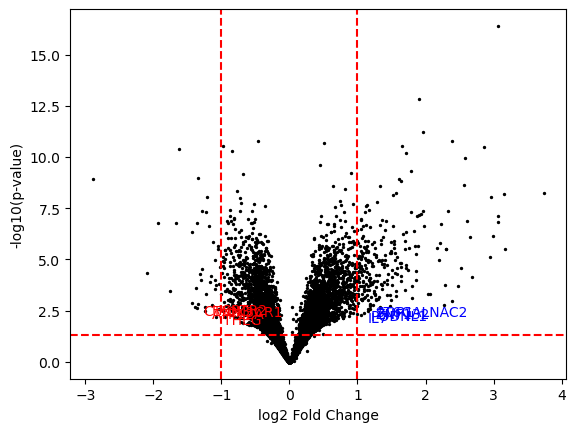

Plotting: hc_c9_df_in


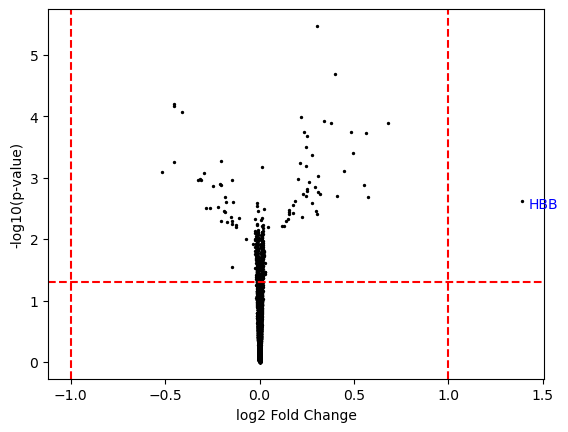

Plotting: hc_tdp_df_ex


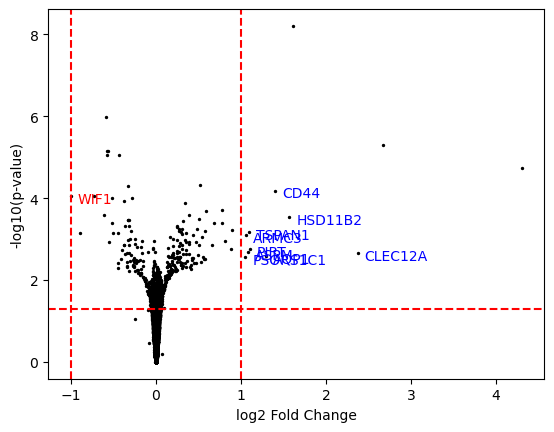

In [32]:
#Volcano plot
#============

#iter over all_stats_res dict
for cstats_res in all_stats_res:
    
    print(f'Plotting: {cstats_res}')
    #removing NaNs
    results = all_stats_res[cstats_res].dropna()
    
    # Create the volcano plot
    fig, ax = plt.subplots()
    ax.scatter(results['log2FoldChange'], results['pvalue'].apply(lambda x: -1*np.log10(x)), c='black',s=2)
    ax.set_xlabel("log2 Fold Change")
    ax.set_ylabel("-log10(p-value)")
    #ax.set_title("Volcano Plot")

    # Add horizontal line for significance threshold
    ax.axhline(-1*np.log10(0.05), color='red', linestyle='--')
    
    # Add vertical lines for FC threshold
    ax.axvline(x=-1, color='red', linestyle='--')
    ax.axvline(x=1, color='red', linestyle='--')
    
    # Find significant genes
    sig_genes = results[(results['pvalue'] < 0.05) & (abs(results['log2FoldChange']) > 1)]
    
    # Get the top 10 most significant genes
    top10_genes = sig_genes.sort_values(by='pvalue',ascending=False).head(10)

    # Annotate significant genes
    for i, gene in top10_genes.iterrows():
        if gene['log2FoldChange']>0:
            color = 'blue'
        else:
            color = 'red'
        ax.annotate(i, (gene['log2FoldChange'], -1*np.log10(gene['pvalue'])), textcoords="offset points",
                    xytext=(5,-5), ha='left', color=color)
    
   
    #Save the plot
    plt.savefig(opath+cstats_res+'volcano_plots.png')

    # Show the plot
    plt.show()

In [33]:
#Select significative genes and export
#=====================================

all_sig_genes_df ={}


#iter over all_stats_res dict
for cstat in all_stats_res:
    df = all_stats_plot[cstat].dropna()
    
    # Sort by p-value in ascending order order
    df.sort_values(by='pvalue', ascending=True)
    
    # Set cutoff
    df_pval = df[df['pvalue']<0.05]
    
    # Number of significative genes 
    print(f'For {cstat} there is {df_pval.shape[0]} significative genes')
    
    # Save significative genes subsets
    all_sig_genes_df[cstat] = df_pval
    
    # Save significative genes names for GO enrich
    print(f'Saving {cstat} gene names as .csv')
    gene_names = df_pval.index.rename(cstat).to_frame() 
    gene_names.to_csv(opath_files+cstat+'_genes.csv', index=False)

For hc_tau_df_ex there is 4893 significative genes
Saving hc_tau_df_ex gene names as .csv
For hc_c9_df_in there is 363 significative genes
Saving hc_c9_df_in gene names as .csv
For hc_tdp_df_ex there is 1062 significative genes
Saving hc_tdp_df_ex gene names as .csv
